In [1]:
# This is the template for the submission. If you want, you can develop your algorithm in a regular Python script and copy the code here for submission.

# Team members (e-mail, legi):
# zhisun@ethz.ch, 22-958-227
# enjcao@ethz.ch, 22-942-700
# yifzhou@ethz.ch, 22-940-381


""" categories (weight 0.1 for cycle, 0.05 for each of other three activities):
standing still: 0 or 1
walk: 0 or 1
run: 0 or 1
cycle: 0 or 1 """

' categories (weight 0.1 for cycle, 0.05 for each of other three activities):\nstanding still: 0 or 1\nwalk: 0 or 1\nrun: 0 or 1\ncycle: 0 or 1 '

In [2]:
import pandas as pd
import math
from Lilygo.Recording import Recording
from Lilygo.Dataset import Dataset
from os import listdir
from os.path import isfile, join
from math import sqrt
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [43]:
# Get the path of all traces
dir_data = 'E:\\Sunzhichao\\ETHz\\2223Spring\\Mobile_Health\\data\\'
dir_traces = dir_data + 'train\\'
dir_labels = dir_data + 'labels\\'
dir_loaded = dir_data + 'Loaded_data\\'
filenames = [join(dir_traces, f) for f in listdir(dir_traces) if isfile(join(dir_traces, f))]
data_win_counts = np.load(dir_loaded + 'train_data_count.npy')
activity_labels = np.load(dir_loaded + 'train_activity_label.npy')
filenames.sort()


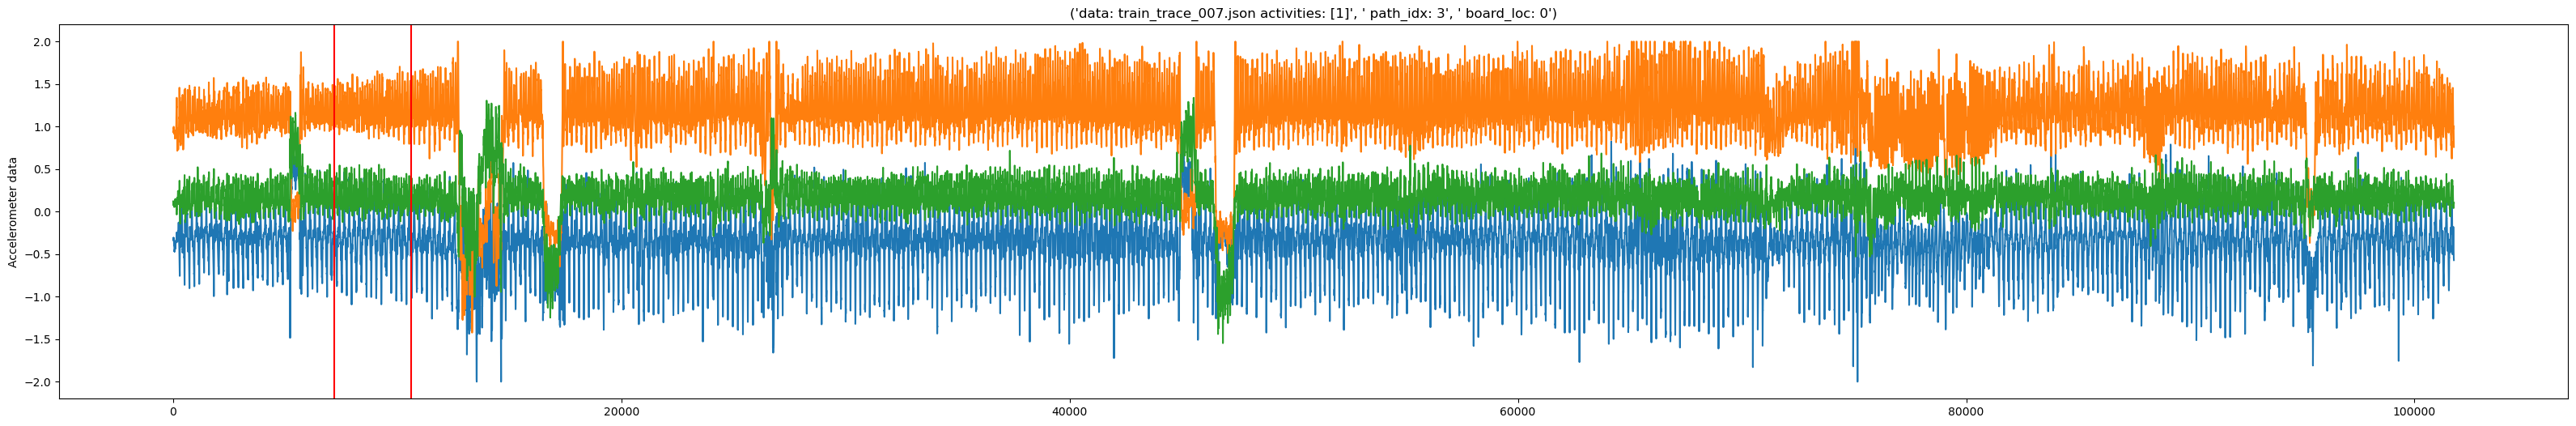

In [233]:
file_id = 6
filename = filenames[file_id]
trace = Recording(filename, no_labels=False, mute=True)
data_win_count = data_win_counts[file_id]
sampling_rate = 200
std_win = 3 #s
window_size = round(std_win*sampling_rate)

# plot
title = "data: " + filename.split('\\')[-1] + " activities: " + str(trace.labels['activities']), " path_idx: " + str(trace.labels['path_idx']), " board_loc: " + str(trace.labels['board_loc'])

fig, ax = plt.subplots(1, 1, figsize=(40, 6), sharex=True)
ax.set_title(title)
ax.plot(trace.data['ax'].values)
ax.plot(trace.data['ay'].values)
ax.plot(trace.data['az'].values)
ax.set_ylabel('Accelerometer data')
# ax[1].plot(trace.data['gx'].values)
# ax[1].plot(trace.data['gy'].values)
# ax[1].plot(trace.data['gz'].values)
# ax[1].set_ylabel('Gero data')

ax.axvline(7200, color = 'r')
ax.axvline(10600, color = 'r')


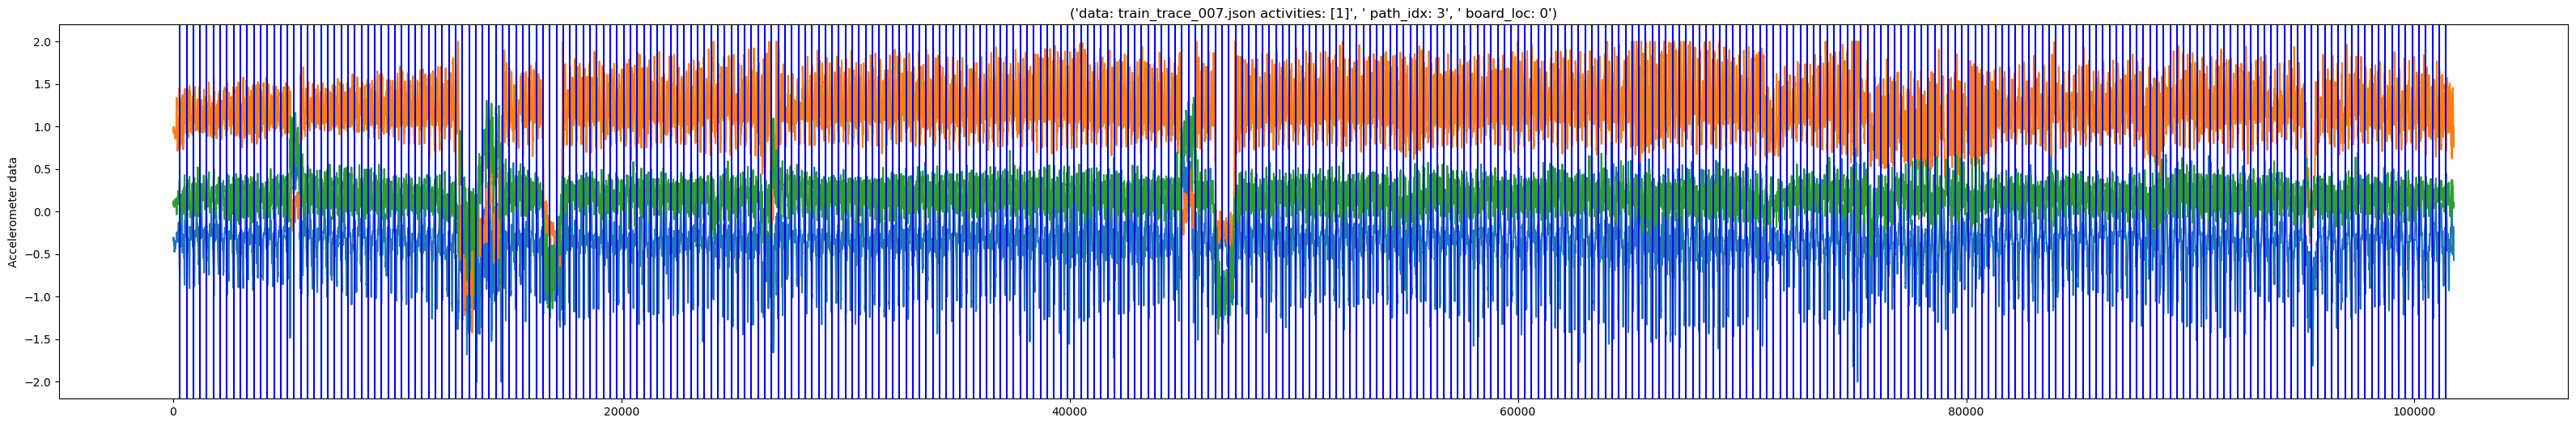

In [234]:
# generating labels
window_labels = np.zeros((data_win_count+1))
window_labels[0] = file_id+1
window_labels[1:] = 1
# window_labels[1:round(7200*2/window_size)] = 1
# window_labels[round(7200*2/window_size):round(10600*2/window_size)] = 0
# # window_labels[round(46500*2/window_size):round(47800*2/window_size)] = 0
# # window_labels[round(60300*2/window_size):round(111500*2/window_size)] = 1
# # window_labels[round(111500*2/window_size):round(129500*2/window_size)] = 0
# window_labels[round(10600*2/window_size):] = 1

fig, ax = plt.subplots(1, 1, figsize=(40, 6), sharex=True)
ax.set_title(title)
ax.plot(trace.data['ax'].values)
ax.plot(trace.data['ay'].values)
ax.plot(trace.data['az'].values)
ax.set_ylabel('Accelerometer data')
color = ['r', 'b','g','y']
for i, label in enumerate(window_labels[1:]):
    ax.axvline((i+1)*window_size/2, color = color[int(label)])

In [235]:
# save label to txt file
with open(dir_labels+'action_labels_train.txt', 'a') as f:
    f.write(','.join(map(str, window_labels)) + '\n')
